# Forecasts and Predictions Project

The gym chain Model Fitness is developing a customer interaction strategy based on analytical data. The task is to analyze the existing situation, to look at the efficiency of tools used to attract and retain new customers, and come up with recommendations.

### The goals:
- To predict the probability of churn (for the upcoming month) for each customer
- To draw up typical user portraits: to select the most outstanding groups and describe their main features;
- To analyze the factors that impact churn most;
- To draw basic conclusions and develop recommendations on how to improve customer service:
    - To identify target groups;
    - To suggest measures to cut churn;
    - To describe any other patterns seen with respect to interaction with customers.

### The dataset includes the following fields:

- `Churn` — the fact of churn for the month in question

User data for the preceding month
- `gender`
- `Near_Location` — whether the user lives or works in the neighborhood where the gym is located
- `Partner` — whether the user is an employee of a partner company (the gym has partner companies whose employees get discounts; in those cases the gym stores information on customers' employers)
- `Promo_friends` — whether the user originally signed up through a "bring a friend" offer (they used a friend's promo code when paying for their first membership)
- `Phone` — whether the user provided their phone number
- `Age`
- `Lifetime` — the time (in months) since the customer first came to the gym

Data from the log of visits and purchases and data on current membership status

- `Contract_period` — 1 month, 3 months, 6 months, or 1 year
- `Month_to_end_contract` — the months remaining until the contract expires
- `Group_visits` — whether the user takes part in group sessions
- `Avg_class_frequency_total` — average frequency of visits per week over the customer's lifetime
- `Avg_class_frequency_current_month` — average frequency of visits per week over the preceding month
- `Avg_additional_charges_total` — the total amount of money spent on other gym services: cafe, athletic goods, cosmetics, massages, etc.

## Libraries and Data

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage 
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

Now let's upload our data set

In [2]:
fitness = pd.read_csv('/datasets/gym_churn_us.csv')
fitness.head(5)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


I'll lowercase the columns' names for better convenience

In [3]:
fitness.columns= fitness.columns.str.lower()
fitness.head(5)

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


## Exploratory data analysis (EDA)

In [4]:
fitness.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   near_location                      4000 non-null   int64  
 2   partner                            4000 non-null   int64  
 3   promo_friends                      4000 non-null   int64  
 4   phone                              4000 non-null   int64  
 5   contract_period                    4000 non-null   int64  
 6   group_visits                       4000 non-null   int64  
 7   age                                4000 non-null   int64  
 8   avg_additional_charges_total       4000 non-null   float64
 9   month_to_end_contract              4000 non-null   float64
 10  lifetime                           4000 non-null   int64  
 11  avg_class_frequency_total          4000 non-null   float

Let's check the data for missing values

No values missing

Let's check the data for duplicates

In [5]:
fitness.duplicated().sum()

0

No duplicated values

In [6]:
fitness.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


We are interested in two groups of clients - those who stay and those who left. Let's group the data according to this principle.

In [7]:
fitness_churn = fitness.groupby(['churn']).mean()
fitness_churn

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


Let's built some graphs for better clarity

In [8]:
fitness_stay = fitness.loc[fitness['churn']==0]

In [9]:
fitness_left = fitness.loc[fitness['churn']==1]

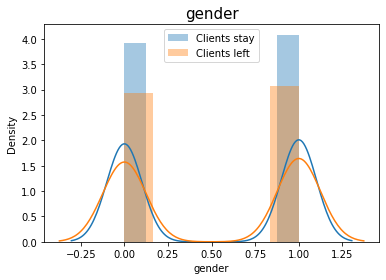

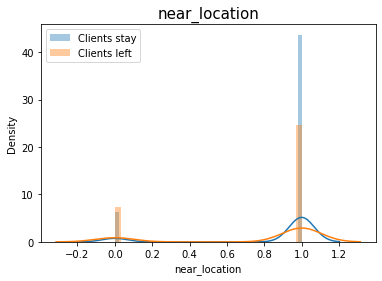

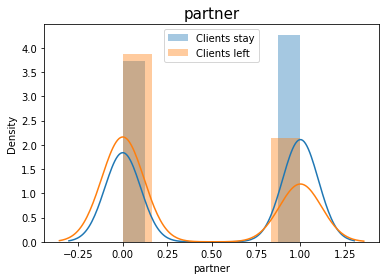

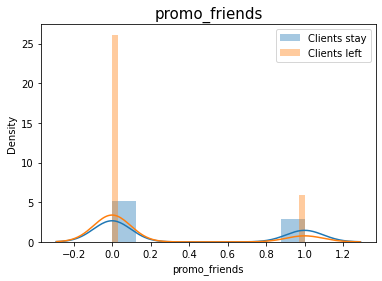

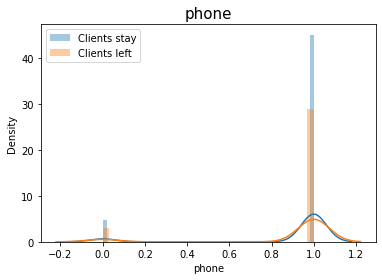

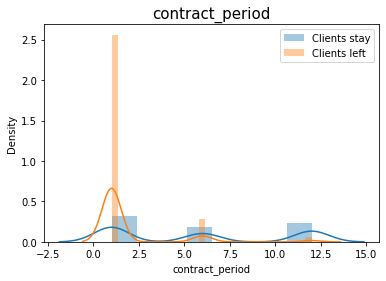

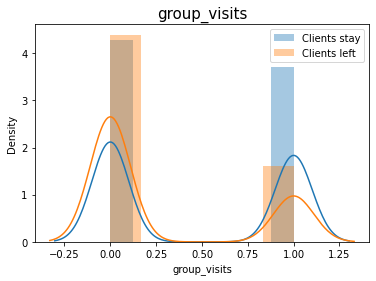

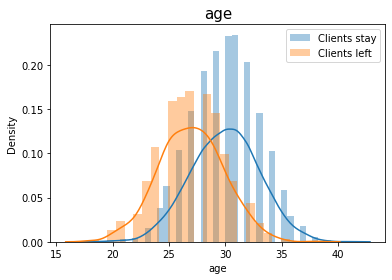

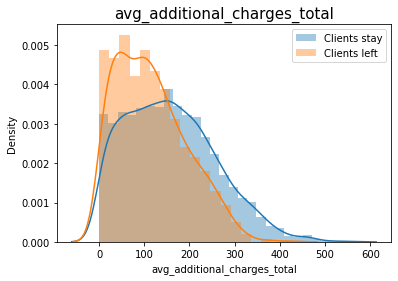

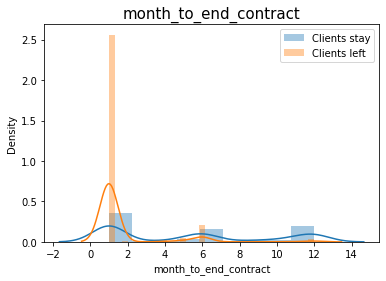

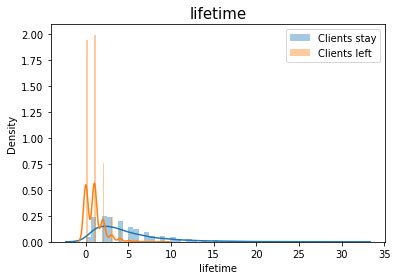

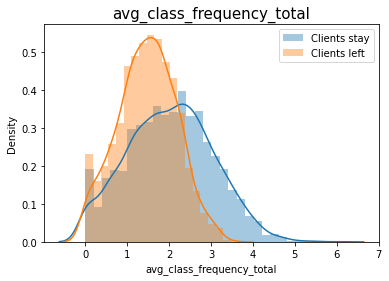

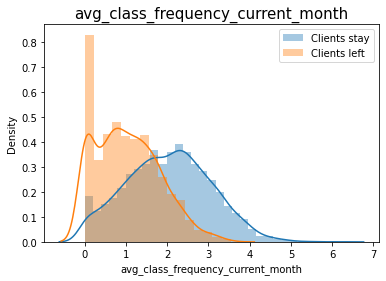

In [10]:
for col in fitness.drop('churn', axis=1).columns:
    sns.distplot(fitness_stay[col], label = 'Clients stay')
    sns.distplot(fitness_left[col], label = 'Clients left')
    plt.title(col, fontsize = 15)
    plt.legend()
    plt.show()

Findings:
- The genders are raughly evenly balanced in two groups;
- Among those who live far from location there are slightly more those who quit than those who stay; Among those who live nearby those who stay are twice more numerous than those who left;
- Among those who came through partner program there are twice more stayers than quiters; 
- The share of quitters among those who did not come with friends promo is much higher than among stayers; 
- The share of stayers is much higher among those who mentioned their phone number than among those who did not ;
- The longer is contract period, the weaker is tendency to quit. The majority of quiters had a 1-month-length contract;
- Among those who prefer group classes there are much more stayers than quitters;
- The elder clients the more they tend to keep on with their trainings;
- Those who stay tend to spend more on additional charges;
- The majority of quitters had only 1 month before the end of their contract;
- The quitters' 'lifetime' in the fitness center is much shorter;
- Those who practice more than twice a week tend to stay. Those who pactice 0-2 times a week tend to quit.

Let's built a correlation matrix and a heatmap based on it.

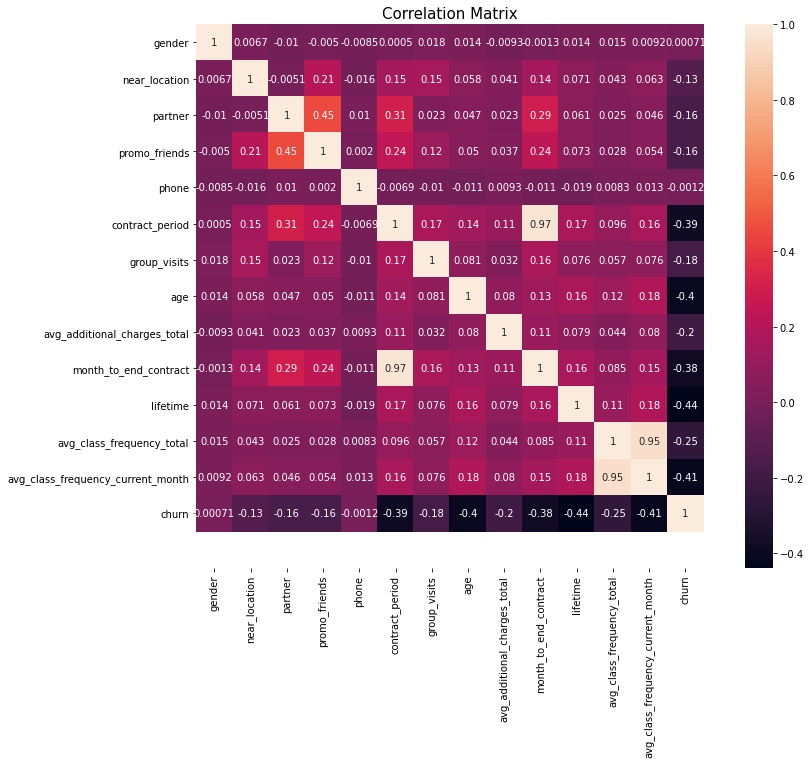

In [11]:
corr = fitness.corr()
fig, ax = plt.subplots(figsize = (15, 10))

sns.heatmap(corr, annot = True, square = True)
ax.set_ylim(15, 0)
plt.title('Correlation Matrix', fontsize = 15)
plt.show()

Findings:
- there are moderate-to-strong correlations between partner and promo-friends, meaning that friends-collegues tend to sign up together for the fitness services.
- there seems to be moderate negative correlation between churn rate and client's age, 'lifetime', contract period, months_to_end_contract, and avg_class_frequency_current_month.
- contract_period is highly correlatd with month_to_end_contract;
- avg_class_frequency_current_month is highly correlated with avg_class_frequency_total;
- to eliminate bias it's better to drop 'avg_class_frequency_total' and 'contract_period' columns;

In [12]:
fitness_nc = fitness.drop(['avg_class_frequency_total', 'contract_period'], axis = 1)
fitness_nc.head(5)

,gender,near_location,partner,promo_friends,phone,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_current_month,churn
0,1,1,1,1,0,1,29,14.227470,5.0,3,0.000000,0
1,0,1,0,0,1,1,31,113.202938,12.0,7,1.910244,0
2,0,1,1,0,1,0,28,129.448479,1.0,2,1.736502,0
3,0,1,1,1,1,1,33,62.669863,12.0,2,3.357215,0
4,1,1,1,1,1,0,26,198.362265,1.0,3,1.120078,0


### Intermediate conclusions

- Gender is distributed evenly;
- Both majority of stayers and quitters live nearby, though those who live far tend to quit more.
- Many quitters are not partners and did not use promo-code. That means most of the quitters paid full price;
- At the same time, the majority of quitters had a 1-month only contract and left after the first month was over;
- Younger clients have a higher tendency to quit;
- Group classes are more popular among those clients who eventually stay;
- Those who stay, spend more money on extra charges (which is predictable);
- Those who stay tend to visit the fitness center more frequently during the week than those who eventully quit;
- In a current month, there are many quitters who did not attend even 1 class;


- A client with a high risk to quit early seems to be a a man or woman in their early 20s, living far from the location, who bought a full-price 1-month contract, visits center no more often than twice a week, and do not enjoy group classes;
- A loyal client seems to be a a man or woman in their early 30s, living nearby, who bought a longterm contract through a partners program or with friend's promo, visiting center more than twice a week.

## Building a model to predict user churn

We need to divide the data into train and validation sets, train the scaler and tranform matrix for train set. Also need to apply standartization for the feature matrix for test set.

In [13]:
X = fitness_nc.drop('churn', axis = 1)
y = fitness_nc['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 

scaler = StandardScaler()
scaler.fit(X_train)

X_train_st = scaler.transform(X_train)

X_test_st = scaler.transform(X_test)

### Logistic Regression

In [14]:
model_1 = LogisticRegression(random_state = 0, solver = 'newton-cg')
model_1.fit(X, y)

predictions_1 = model_1.predict(X_test)
probabilities_1 = model_1.predict_proba(X_test)[:, 1]


In [15]:
def mape (y_test, y_pred):
    y_error = y_test - y_pred
    y_error_abs = [abs(i) for i in y_error]
    perc_error_abs = y_error_abs / y_test
    mape = (perc_error_abs.sum() / len(y_test))
    return mape

def print_all_metrics(y_true, y_pred, y_proba, title = 'Metrics'):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))
    print('\tF1: {:.2f}'.format(f1_score(y_true, y_pred)))
    print('\tROC_AUC: {:.2f}'.format(roc_auc_score(y_true, y_pred)))
    print('\tMAE:{:.2f} MSE:{:.2f} MAPE:{:.2f} R2:{:.2f}'.format(mean_absolute_error(y_true, y_pred), mean_squared_error(y_true, y_pred), mape(y_true, y_pred), r2_score(y_true, y_pred)))
          
print_all_metrics(y_test, predictions_1, probabilities_1, title='Metrics for the automatic prediction made with predict for logistic regression')
print()    


Metrics for the automatic prediction made with predict for logistic regression
	Accuracy: 0.91
	Precision: 0.81
	Recall: 0.82
	F1: 0.81
	ROC_AUC: 0.88
	MAE:0.09 MSE:0.09 MAPE:inf R2:0.50



### Random Forest

In [16]:
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0)

rf_model.fit(X_train_st, y_train)

rf_predictions = rf_model.predict(X_test_st)
rf_probabilities = rf_model.predict_proba(X_test_st)[:,1]

print_all_metrics(y_test, rf_predictions, rf_probabilities, title='Metrics for Random Forest Classifier')

print()

feature_weights2 = rf_model.feature_importances_
print('feature importance:', feature_weights2)

Metrics for Random Forest Classifier
	Accuracy: 0.89
	Precision: 0.76
	Recall: 0.79
	F1: 0.77
	ROC_AUC: 0.85
	MAE:0.12 MSE:0.12 MAPE:inf R2:0.38

feature importance: [0.01639645 0.01166161 0.01548396 0.01307245 0.00771771 0.02065957
 0.14953261 0.12139407 0.11678776 0.31646541 0.21082838]


### Evaluation of accuracy, precision, and recall for both models using the validation data. 

Accuracy: 
Random Forest 0.89
Logic Regression 0.92

Precision:
Random Forest 0.79
Logic Regression 0.83

Recall:
Random Forest 0.76
Logic Regression 0.83

F1:
Random Forest 0.77
Logic Regression 0.83

ROC_AUC:
Random Forest 0.83
Logic Regression 0.89

### Intermediate conclusion
Based on the comparisons above, we can say that Logistic Regression is a better model for our case. Accuracy value is less importanthere, while Precision and Recall values are significantly higher for Logic Regression. F1 and  are also better for LR. R2 is also much higher for LR.

## Creating user clusters

Let's standartize the data first

In [17]:
sc = StandardScaler()
x_sc = sc.fit_transform(X)

print(x_sc[:3])

[[ 0.97970588  0.42788074  1.02686062  1.49716101 -3.05985201  1.19403206
  -0.0565538  -1.37753121  0.16160501 -0.19332863 -1.67847198]
 [-1.0207145   0.42788074 -0.973842   -0.66793083  0.32681319  1.19403206
   0.55732732 -0.35021325  1.83194105  0.87368001  0.1360137 ]
 [-1.0207145   0.42788074  1.02686062 -0.66793083  0.32681319 -0.83749845
  -0.36349436 -0.1815923  -0.79287273 -0.46008079 -0.02901851]]


Let's built the matrix of distances and plot dendrogram

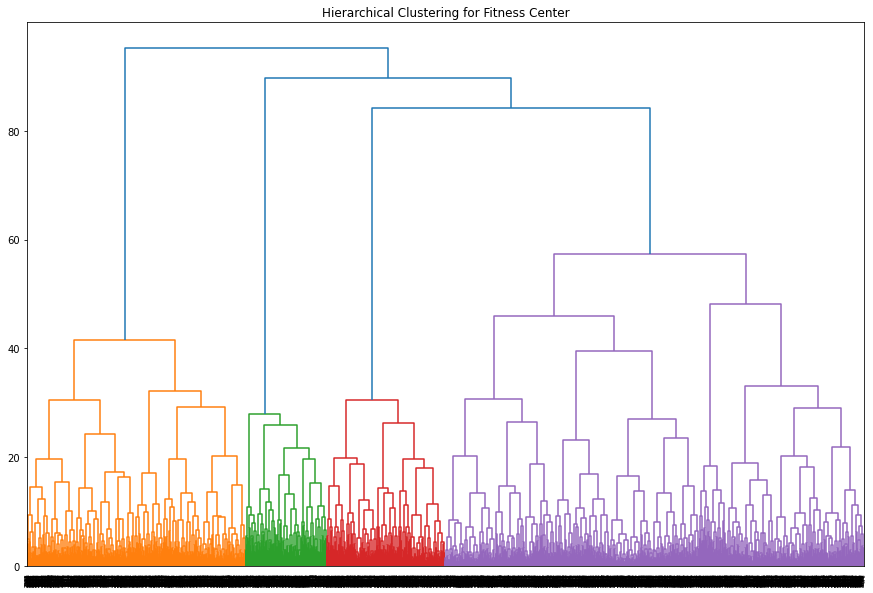

In [18]:
linked = linkage(x_sc, method = 'ward')

plt.figure(figsize = (15, 10))
dendrogram(linked, orientation = 'top')
plt.title('Hierarchical Clustering for Fitness Center')
plt.show()

Let's train the clustering model with the K-means algorithm and predict customer clusters. The number of clusters will be set as n=5.

In [19]:
def show_clusters_on_plot (df, x_name, y_name, cluster_name):
    plt.figure(figsize = (10,10))
    sns.scatterplot(df[x_name], df[y_name],
            hue = df[cluster_name], palette = 'Paired'
        )
    plt.title('{} vs {}'.format(x_name, y_name))
    plt.show()

km = KMeans(n_clusters = 5, random_state = 0)
labels = km.fit_predict(x_sc)

fitness_nc['cluster_num'] = labels

fitness_nc.head(5)


,gender,near_location,partner,promo_friends,phone,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_current_month,churn,cluster_num
0,1,1,1,1,0,1,29,14.227470,5.0,3,0.000000,0,0
1,0,1,0,0,1,1,31,113.202938,12.0,7,1.910244,0,4
2,0,1,1,0,1,0,28,129.448479,1.0,2,1.736502,0,2
3,0,1,1,1,1,1,33,62.669863,12.0,2,3.357215,0,0
4,1,1,1,1,1,0,26,198.362265,1.0,3,1.120078,0,0


Let's look at the mean feature values for clusters. We need to group the data by cluster numner for that.

In [20]:
fitness_nc_grp = fitness_nc.groupby(['cluster_num']).mean()
fitness_nc_grp

,gender,near_location,partner,promo_friends,phone,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_current_month,churn
cluster_num,,,,,,,,,,,,
0,0.492000,0.994000,0.953000,1.000000,0.906000,0.528000,29.633000,154.086252,6.730000,4.287000,1.919105,0.108000
1,0.495352,0.998672,0.378486,0.046481,0.903054,0.000000,30.342629,174.392898,4.698539,5.166003,2.237272,0.046481
2,0.511194,1.000000,0.226368,0.114428,0.899254,0.182836,26.807214,111.073289,1.715174,1.420398,0.978977,0.741294
3,0.502455,0.000000,0.489362,0.072013,0.913257,0.232406,28.700491,137.375245,2.826514,3.027823,1.599583,0.400982
4,0.550481,0.998798,0.274038,0.075721,0.897837,1.000000,30.248798,155.206260,4.707933,4.483173,2.043261,0.092548


Findings from the mean values by clusters:

   - Cluster 0 includes those clients signed up through the partner program and/or came with friend's promo and have quite high value of group classes participation. They have the more than 6 months till the end of the contract (the highest value among the clusters);
    
   - Cluster 1 does not enjoy group classes at all. They have the highest expences on extra charges, the longest lifetime, the highest frequency in the current month and the lowest churn rate;
    
   - Cluster 2 is the youngest group on the average (<27); they spend the least on extra charges, have less than 2 months left till the end of the contract, the shortest lifetime (<1.5 months), and have the highest churn rate;  
    
   - In Cluster 3 there are those who live really far from the location. They also have quite short lifetime (3 months), and less than 3 months left before the contract ends. They have quite a high churn rate;
    
   - Cluster 4 contains those who enjoy group classes.
   


Churn rates calculations by clusters:
   - Clusters 1 has less than 5% churn rate;
   - About 10% of clients from clusters 0 and 4 are likely to churn; 
   - Cluster 3 has a churn rate of 40%; 
   - 3/4 of clients from cluster 2 are likely to churn.

Let's plot distributions of features for the clusters

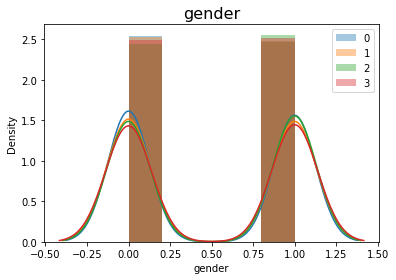

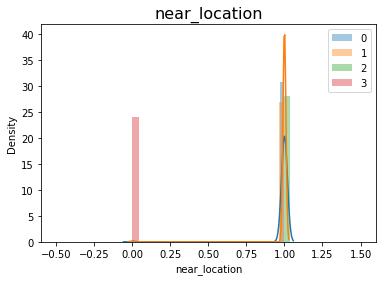

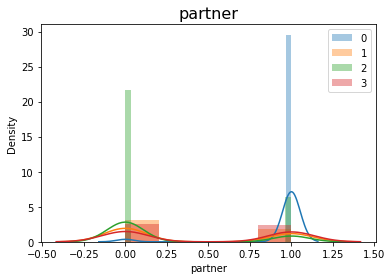

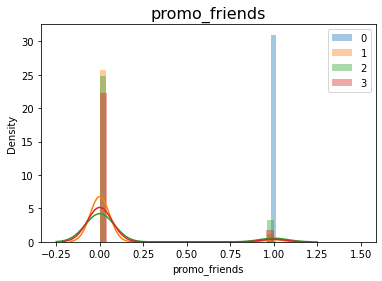

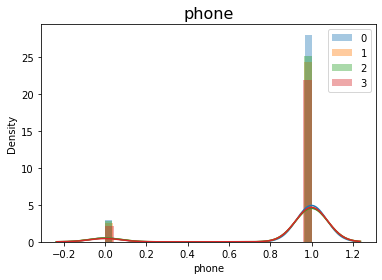

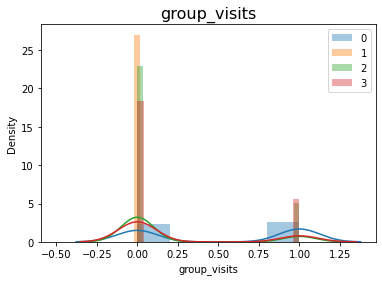

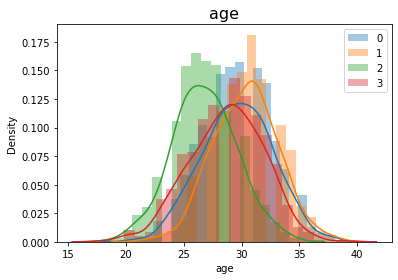

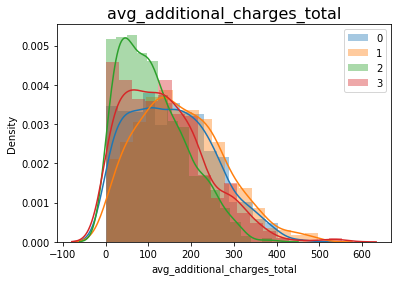

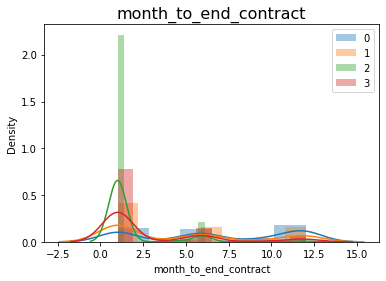

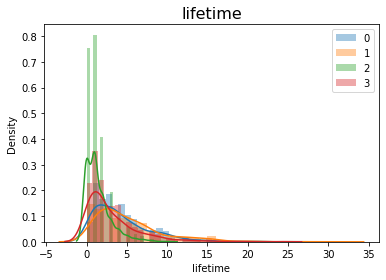

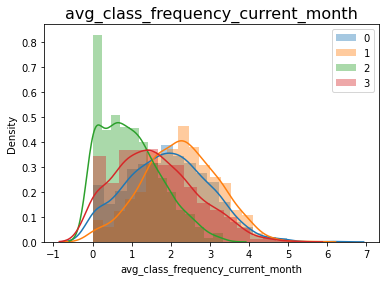

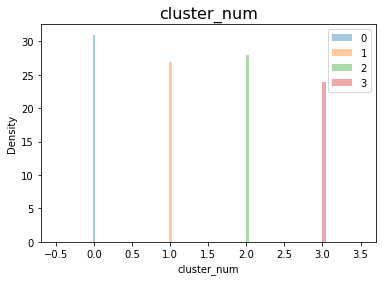

In [21]:
for col in fitness_nc.drop('churn', axis = 1).columns:
    for i in range(0,4):
        fitness_n = fitness_nc.loc[fitness_nc['cluster_num']==i]
        sns.distplot(fitness_n[col], label = i)
    plt.title(col, fontsize=16)
    plt.legend()
    plt.show()

The graphs illstrate the previous findings:

   - The cluster with the lowest (<5%) churn rate (Cluster 1) predominantly includes clients in their early 30s, who sign up for a long-term contract and visits the center more than twice a week, tend to spend more on additional charges (merchandise or maybe snacks);
   
   - The clusters with the highest churn rate (74%) paid full price (neither through friends' promo nor through partner program) for a 1-month contract, spend less on additional charges;
   
   - Among those who leave far the churn rate is still very high (40%).

## Conclusions and basic recommendations on working with customers

- If the fitness center wishes to decrease churn rates, it probably should re-design their sales policy. 1-month full-price contracts do not seem to be efficient. Maybe one could think of free or discounted trial visits; 
- Obviously, it's less convenient to come for those who live far from the location. So, probably the center should concentrate its marketing energy on those who live nearby or think of opening a new branch in a different location;
- Younger audience seems to be less attracted by the center's services. Probably, one could think of some discounted programs for students;
- Those who buy extra staff in the fitness center, tend to end up with higher loyalty to its core services. Probably, the center could expand and diversify the range of merchendise and other products they offer inside;
- Partner programs and friend's promos seem to work well. The center should expand these marketing strategies.
- Perhaps, the center should encourage group classes. Those who practice in groups seem to have a lesser risk to quit earlier.